In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
v=pd.read_csv('/content/gdrive/MyDrive/CRISIS_1-20220401T060043Z-001/CRISIS_1/task_informative_text_img_train.csv')

In [ ]:
dict={'informative':0,'not_informative':1}

In [ ]:
v.label_text.replace(dict,inplace=True)
v.label_image.replace(dict,inplace=True)
v.label.replace(dict,inplace=True)

In [ ]:
x=v[['label_image','label_text']]

In [ ]:
y=v['label']

In [ ]:
from sklearn.ensemble import RandomForestClassifier


RandomForestClassifier(n_estimators=50)

save Model

In [ ]:
import joblib
joblib.dump(final_model, 'randomforestclassifier1.pkl')

['randomforestclassifier1.pkl']

Load Model

In [ ]:
# Load the model from the file
text_from_joblib = joblib.load('randomforestclassifier.pkl')

In [ ]:
t=pd.read_csv('/content/gdrive/MyDrive/CRISIS_1-20220401T060043Z-001/CRISIS_1/task_informative_text_img_test.csv')

In [ ]:
t.label_text.replace(dict,inplace=True)
t.label_image.replace(dict,inplace=True)
t.label.replace(dict,inplace=True)

In [ ]:
xtest=t[['label_image','label_text']]

In [ ]:
ytest=t['label']

Train Model

In [ ]:
final_model = RandomForestClassifier(n_estimators=100,max_leaf_nodes=3,max_depth=2,min_samples_leaf=2)
history=final_model.fit(x,y)

Plor learning curve

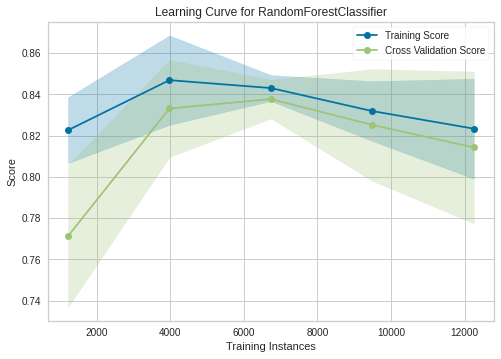

In [ ]:
fig, ax = plt.subplots()

visualizer = LearningCurve(
    final_model, cv=10, scoring='f1'
)

visualizer.fit(x, y)        # Fit the data to the visualizer
plt.savefig('randomforestlearning curve.png')
visualizer.show() 

In [ ]:
ypred = final_model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.8466696468484578
